Integrantes:
- Fátima Trujillo (20181324)
- Cesar Garcia (F1433750)
- Jesús Gamboa (20215309)

In [1]:
!pip install scikit-learn==1.2.2
#!pip install numpy==1.19.5
!pip install econml==0.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uni

In [2]:
import pandas as pd
import numpy as np
import sklearn
import econml

print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("econml version:", econml.__version__)

NumPy version: 1.26.4
scikit-learn version: 1.2.2
econml version: 0.15.0


In [3]:
from google.colab import files

## Pregunta 1
Merge de ambas bases de datos basado en la variable user_id.

In [4]:
# Carga y lectura de datasets
print("Suba ab_data.csv:")
uploaded_ab_data = files.upload()
ab_data = pd.read_csv(list(uploaded_ab_data.keys())[0])

print("Suba countries.csv:")
uploaded_countries = files.upload()
countries = pd.read_csv(list(uploaded_countries.keys())[0])

# Merge de las basas usando la variable user_id
merged_data = ab_data.merge(countries, on='user_id', how='inner')

Suba ab_data.csv:


Saving ab_data.csv to ab_data.csv
Suba countries.csv:


Saving countries.csv to countries.csv


In [5]:
#Revisar la base unida
merged_data.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


## Pregunta 2

Nos quedamos con aquellas observaciones cuya asignación fue perfecta.  Aquellos que pertenecen al grupo de los tratados deben haver visto la pagina nueva y los que pertenecen al control debieron ver la pagina antigua. Esto es muy importante. Esto define los siguientes resultados


In [55]:
# Definir asignamiento prefecto: nos quedamos con los tratados que ven la base nueva y los conytoles que ven la página antigua
asignamiento_perfecto = merged_data[((merged_data['group'] == 'treatment') & (merged_data['landing_page'] == 'new_page')) |
                                  ((merged_data['group'] == 'control') & (merged_data['landing_page'] == 'old_page'))]

In [56]:
# Comparamos el tamaño de ambas bases
print("Tamaño de base merged_data:", merged_data.shape)
print("Tamaño de base asignamiento_perfecto:", asignamiento_perfecto.shape)

Tamaño de base merged_data: (294482, 6)
Tamaño de base asignamiento_perfecto: (290589, 6)


## Pregunta 3

Construir el propensity score de los tratados y controles usando un modelo logistico (aquí tienen que utilizar la variable país y el timestamp en formato númerico. esta variable es la cantidad de tiempo que pasan en la pagina. Usen la variable en formato numérico).. Múestrelos en un plot para ambos grupos, tratados y controles (Histograma). Revisar tutorial.


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


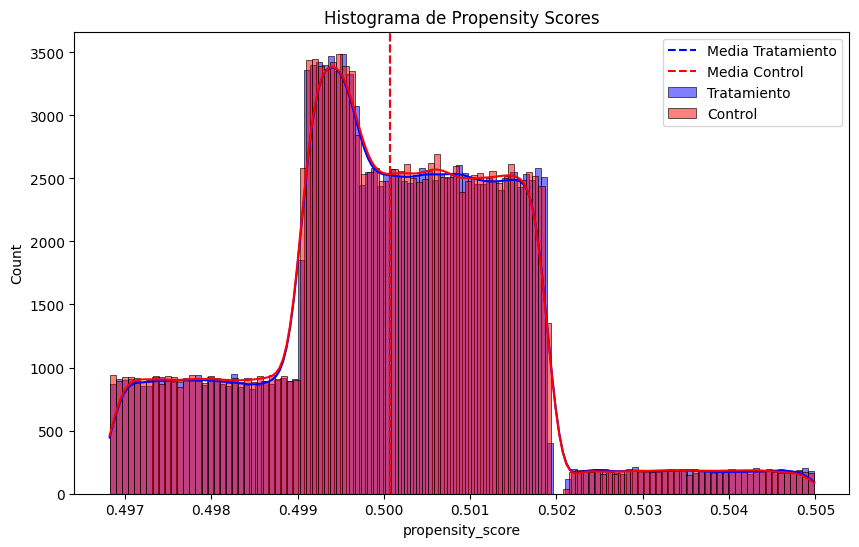

In [57]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

# Construcción del Propensity Score

# Limpieza y conversión de la columna 'timestamp'

def convertir_a_decimal(ts):
    horas, resto = ts.split(':')
    minutos = float(resto)
    return int(horas) + minutos / 60

asignamiento_perfecto['time'] = asignamiento_perfecto['timestamp'].apply(convertir_a_decimal)

# Variables para el modelo logístico
X = pd.get_dummies(asignamiento_perfecto[['country']], drop_first=True)
X = pd.concat([X, asignamiento_perfecto['time']],axis=1)
y = (asignamiento_perfecto['group'] == 'treatment').astype(int)

# Ajustar el modelo logístico
log_model = LogisticRegression()
log_model.fit(X, y)

# Calcular propensity scores
asignamiento_perfecto['propensity_score'] = log_model.predict_proba(X)[:, 1]

# Graficar histogramas de propensity scores
plt.figure(figsize=(10, 6))
sns.histplot(asignamiento_perfecto[asignamiento_perfecto['group'] == 'treatment']['propensity_score'],
             color='blue', label='Tratamiento', kde=True)
sns.histplot(asignamiento_perfecto[asignamiento_perfecto['group'] == 'control']['propensity_score'],
             color='red', label='Control', kde=True)
plt.axvline(asignamiento_perfecto[asignamiento_perfecto['group'] == 'treatment']['propensity_score'].mean(),
            color='blue', linestyle='dashed', label='Media Tratamiento')
plt.axvline(asignamiento_perfecto[asignamiento_perfecto['group'] == 'control']['propensity_score'].mean(),
            color='red', linestyle='dashed', label='Media Control')
plt.legend()
plt.title('Histograma de Propensity Scores')
plt.show()

## Pregunta 4

Construye el histograma de Y* y señale la media en el plot. Revise tutorial

In [58]:
asignamiento_perfecto

,user_id,timestamp,group,landing_page,converted,country,time,propensity_score
0,851104,11:48.6,control,old_page,0,US,11.810000,0.501339
1,804228,01:45.2,control,old_page,0,US,1.753333,0.501818
2,661590,55:06.2,treatment,new_page,0,US,55.103333,0.499279
3,853541,28:03.1,treatment,new_page,0,US,28.051667,0.500566
4,864975,52:26.2,control,old_page,1,US,52.436667,0.499406
...,...,...,...,...,...,...,...,...
294477,697314,20:29.0,control,old_page,0,US,20.483333,0.500926
294478,715931,40:24.5,treatment,new_page,0,UK,40.408333,0.497755
294479,759899,20:29.0,treatment,new_page,0,US,20.483333,0.500926
294480,759899,20:29.0,treatment,new_page,0,US,20.483333,0.500926


In [59]:
asignamiento_perfecto['y_star'] = asignamiento_perfecto['converted'] / ((asignamiento_perfecto['group'] == 'treatment') * asignamiento_perfecto['propensity_score'] - ((asignamiento_perfecto['group'] == 'control') * (1-asignamiento_perfecto['propensity_score'])))
asignamiento_perfecto


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,timestamp,group,landing_page,converted,country,time,propensity_score,y_star
0,851104,11:48.6,control,old_page,0,US,11.810000,0.501339,-0.000000
1,804228,01:45.2,control,old_page,0,US,1.753333,0.501818,-0.000000
2,661590,55:06.2,treatment,new_page,0,US,55.103333,0.499279,0.000000
3,853541,28:03.1,treatment,new_page,0,US,28.051667,0.500566,0.000000
4,864975,52:26.2,control,old_page,1,US,52.436667,0.499406,-1.997625
...,...,...,...,...,...,...,...,...,...
294477,697314,20:29.0,control,old_page,0,US,20.483333,0.500926,-0.000000
294478,715931,40:24.5,treatment,new_page,0,UK,40.408333,0.497755,0.000000
294479,759899,20:29.0,treatment,new_page,0,US,20.483333,0.500926,0.000000
294480,759899,20:29.0,treatment,new_page,0,US,20.483333,0.500926,0.000000


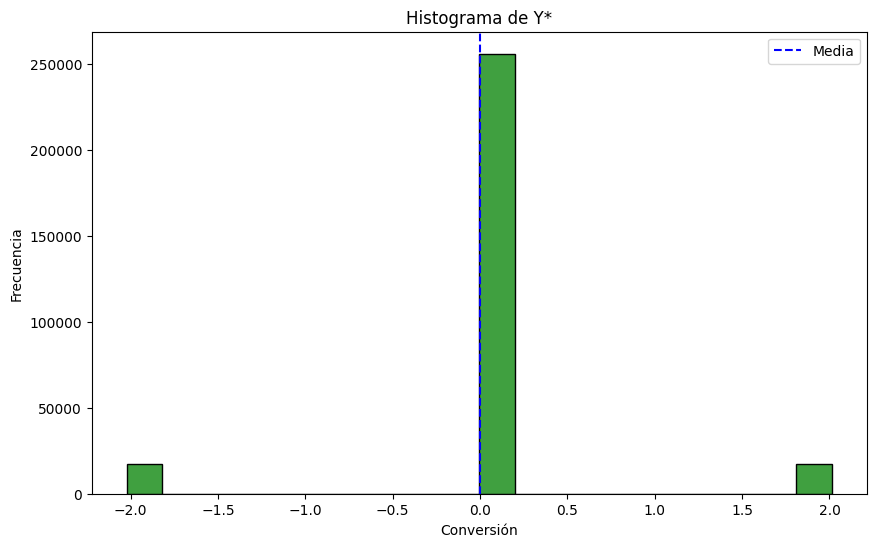

In [60]:
# Histograma de la Variable de Conversión (Y*)
plt.figure(figsize=(10, 6))
sns.histplot(asignamiento_perfecto['y_star'], kde=False, color='green')
plt.axvline(asignamiento_perfecto['y_star'].mean(), color='blue', linestyle='dashed', label='Media')
plt.legend()
plt.title('Histograma de Y*')
plt.xlabel('Conversión')
plt.ylabel('Frecuencia')
plt.show()


## Pregunta 5

Muestre el plot del tree generado para el modelo usando como covariables la variable pais y el timestamp.


In [74]:
X.head()

,country_UK,country_US,time
0,False,True,11.810000
1,False,True,1.753333
2,False,True,55.103333
3,False,True,28.051667
4,False,True,52.436667


In [76]:
y_tree = asignamiento_perfecto['converted'].replace({0: 'no convertido', 1: 'convertido'})
y_tree.head()

,converted
0,no convertido
1,no convertido
2,no convertido
3,no convertido
4,convertido


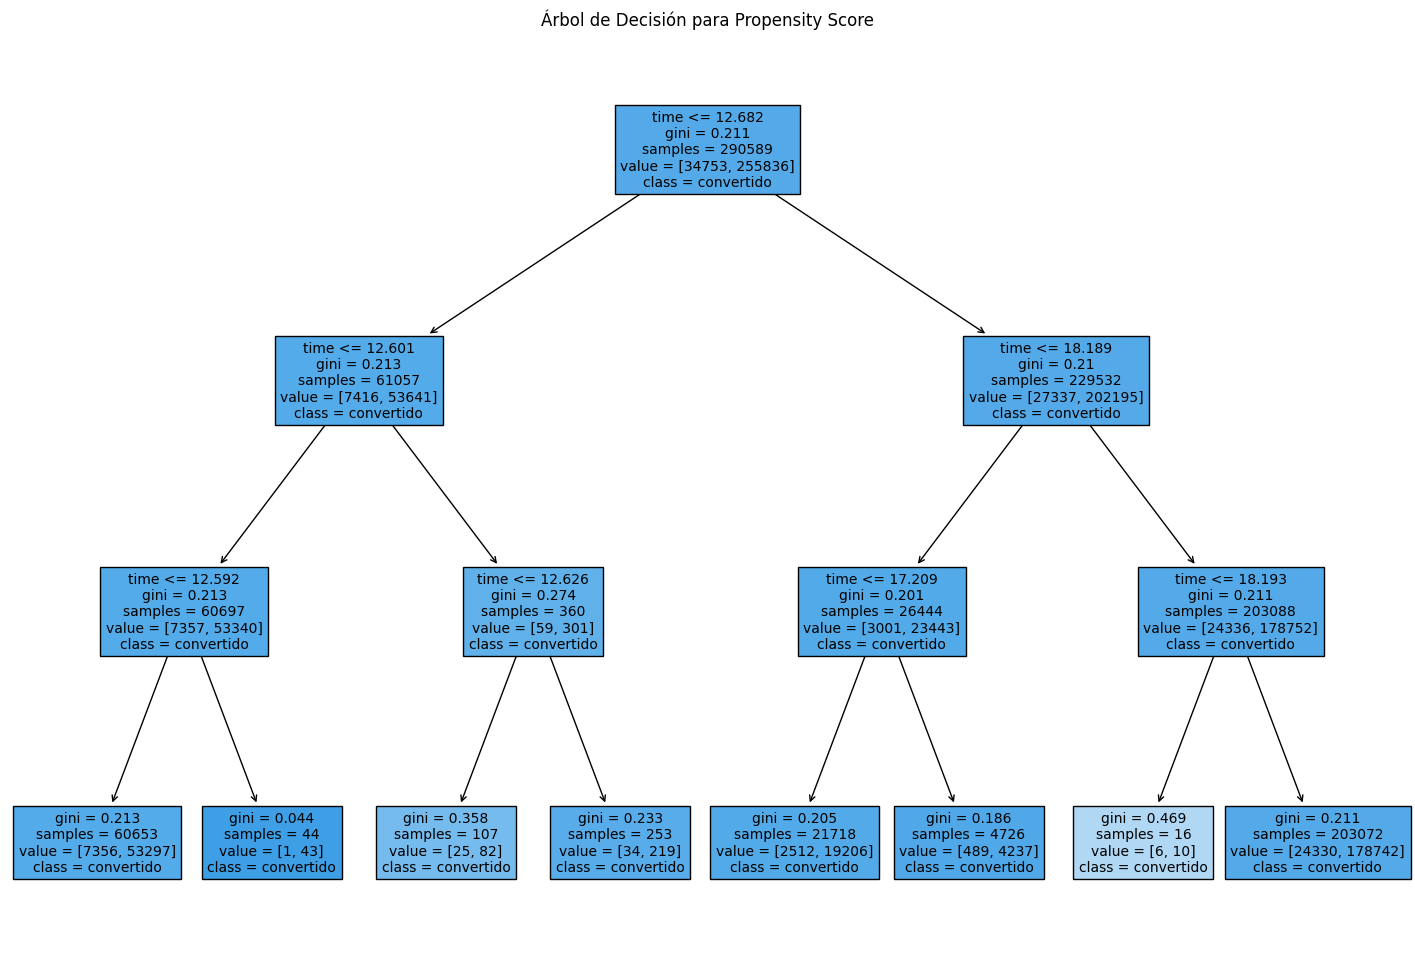

In [88]:
tree_model = DecisionTreeClassifier(max_depth=3)  # Árbol con profundidad máxima de 3
tree_model.fit(X, y_tree)

plt.figure(figsize=(18,12))
plot_tree(tree_model, feature_names=X.columns, class_names=['no convertido', 'convertido'], filled=True, fontsize=10)
plt.title('Árbol de Decisión para Propensity Score')
plt.show()

## Pregunta 6

Repita 5 pero con la libreria econml utilizando SingleTreeCateInterpreter.

In [62]:
np.int = np.int64

In [63]:
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor

In [65]:
from econml.dml import CausalForestDML
np.random.seed(111)
tree_model = CausalForestDML(n_estimators=1, subforest_size=1, inference=False, max_depth=4)
tree_model = tree_model.fit(Y=asignamiento_perfecto['converted'], X=X, T=asignamiento_perfecto['group'].map({'control': 0, 'treatment': 1}))

In [ ]:
causal_model = CausalForestDML(model_t=RandomForestRegressor(),
                                model_y=RandomForestRegressor(),
                                discrete_treatment=True,
                                random_state=42)
causal_model.fit(asignamiento_perfecto['converted'],
                 asignamiento_perfecto['group'].map({'control': 0, 'treatment': 1}),
                 X)

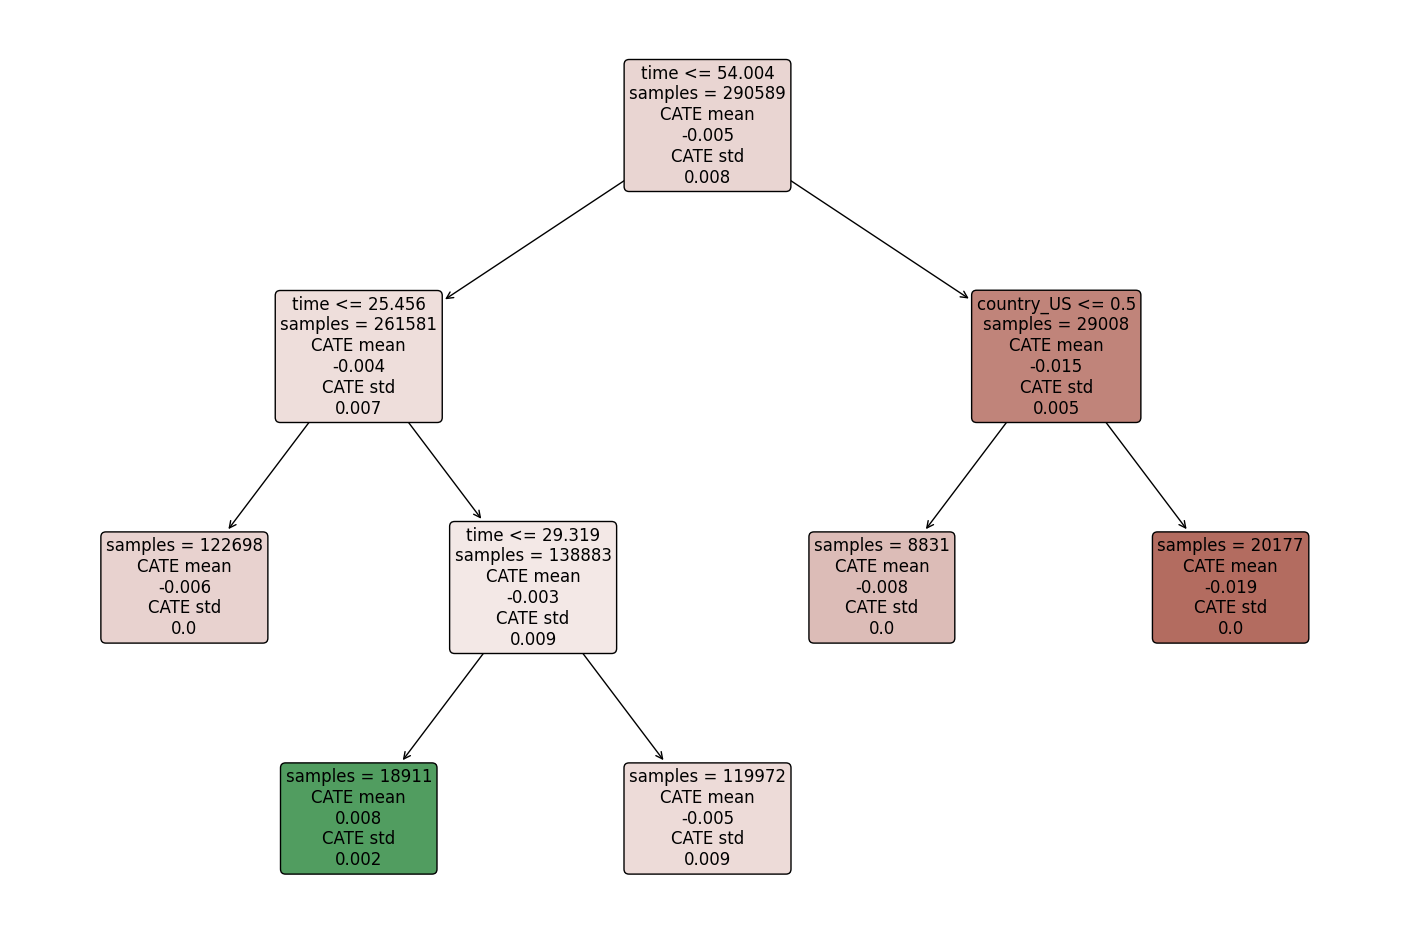

In [86]:
from econml.cate_interpreter import SingleTreeCateInterpreter
plt.figure(figsize=(18,12))
interpreter = SingleTreeCateInterpreter(max_depth=3)
interpreter.interpret(tree_model, X)
interpreter.plot(feature_names=list(X.columns),fontsize=12)
plt.show()

## Pregunta 7

Interprete resultados y compare la imagen en 6 con la imagen en 5. Utilice los términos técnicos y revise la literatura para explicar a detalle que esta haciendo este causal tree y cual es la diferencia con decision trees. Sean precisos al definir que es una honest tree y las ventajas sobre el árbol generado por decision tree.


La imagen de la figura 5 muestra un árbol de decisión basado en el propensity score y la variable time, utilizando un algoritmo de clasificación.

Cada nodo representa una división basada en una condición sobre las variables predictoras, en este caso, principalmente time, ya que country no aparece en la gráfica. Además, la métrica utilizada para dividir es Gini, que mide la pureza de los nodos. Un Gini bajo indica mayor homogeneidad (la mayoría de las observaciones pertenecen a la misma clase).

Este árbol presenta limitaciones, ya que solo evalúa correlaciones y no estima el impacto del tratamiento sobre el resultado. Es útil para entender cómo las características predictoras (time) se relacionan con el resultado, pero no responde preguntas de causalidad.

Dado que en todos los nodos el resultado predominante es la misma clase, es posible que las divisiones no estén capturando información relevante o útil. Si se muestra, de manera complementaria - exploratoria, un boxplot de time para cada nivel de converted, ambas cajas son muy similares, lo que reforzaría el hecho de no encontrar relaciones fuertes.

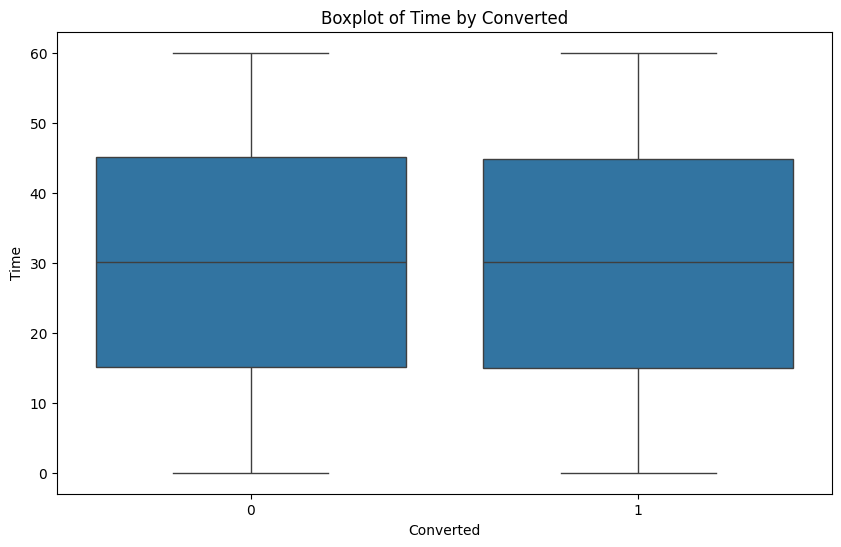

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='converted', y='time', data=asignamiento_perfecto)
plt.title('Boxplot of Time by Converted')
plt.xlabel('Converted')
plt.ylabel('Time')
plt.show()

Con todo, dado que el objetivo es medir el impacto del tratamiento (group) sobre la conversión, el árbol mostrado no nos dará respuestas. La figura de la pregunta 6 muestra un árbol generado mediante un modelo causal, diseñado para estimar el Conditional Average Treatment Effect (CATE), a diferencia del árbol de decisión tradicional que solo busca clasificar o predecir resultados.

Este modelo causal utiliza un enfoque conocido como Honest Trees, en el cual los datos se dividen en dos subconjuntos: uno para construir las reglas de partición y otro para estimar los efectos del tratamiento. Esto asegura que las estimaciones del CATE sean más fiables, ya que minimiza el sesgo introducido por el sobreajuste al separar el proceso de construcción del árbol del cálculo del efecto.

En la raíz del árbol se aprecia que CATE mean = -0.005, esto significa que el efecto promedio estimado del tratamiento en toda la muestra es negativo, es decir, la nueva página parece reducir ligeramente la probabilidad de conversión. No obstante, el árbol divide los datos con base en time y country_US para aislar subgrupos con diferentes efectos del tratamiento.

El grupo con el CATE más alto es el de las personas que pasan entre 25.456 y 29.319 minutos, conformado por 18911 personas. El efecto medio del tratamiento es 0.008, lo que significa que incrementa ligeramente la probabilidad de conversión en este grupo en comparación con los usuarios que vieron la página antigua (control). Además, la baja desviación estándar (0.002) indica que la estimación del efecto es consistente dentro de este grupo.

Por el contrario, el subgrupo con el CATE más bajo (negativo) es el que corresponde a la hoja con las siguientes condiciones: time > 54.004 y country_US > 0.5 (country_US = 1, son de Estados Unidos). En este nodo, conformado por 20177 personas, el tratamiento (la página nueva) tiene un efecto negativo promedio de -0.019, lo que significa que reduce significativamente la probabilidad de conversión en comparación con la página antigua (control).


